<a href="https://colab.research.google.com/github/fjadidi2001/PythonLearning/blob/main/AD_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Path to your dataset
dataset_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

Mounted at /content/drive


# Step 1: Read and Display Original Images


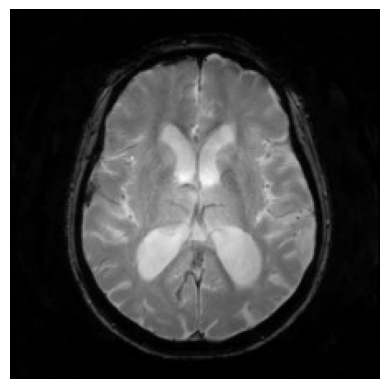

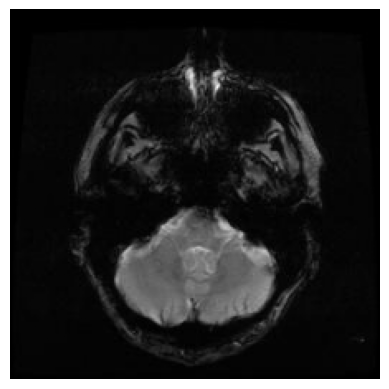

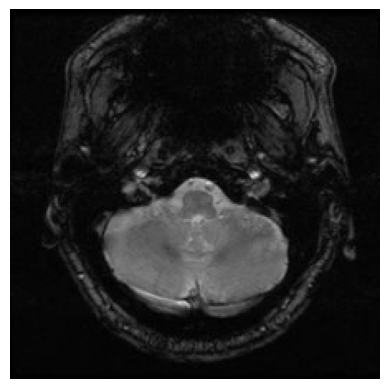

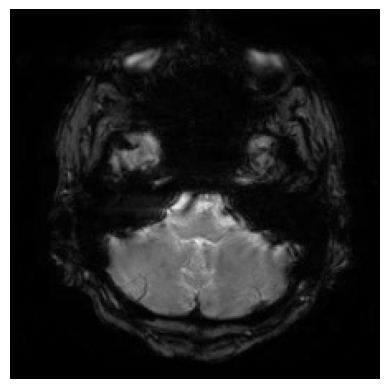

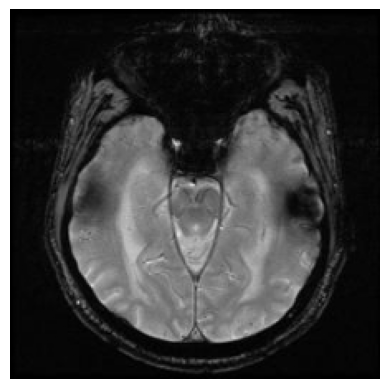

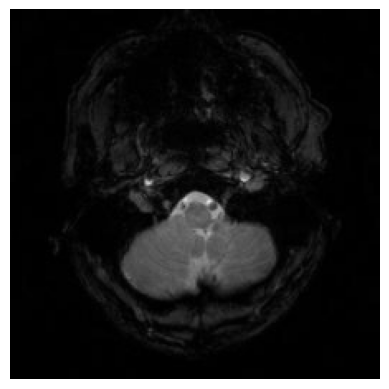

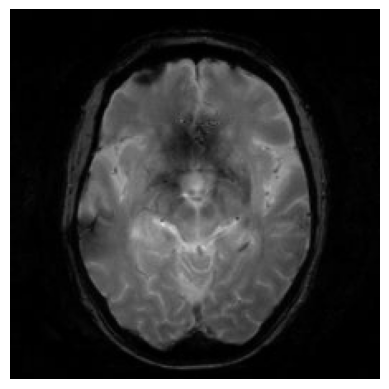

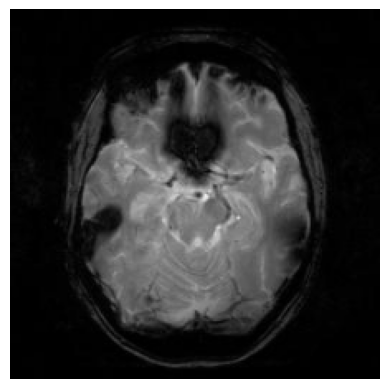

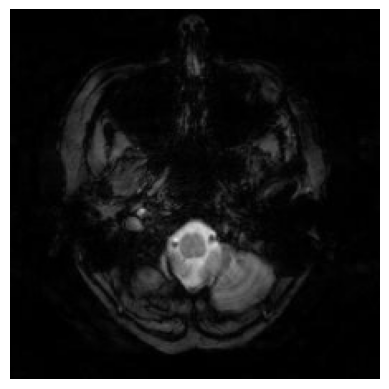

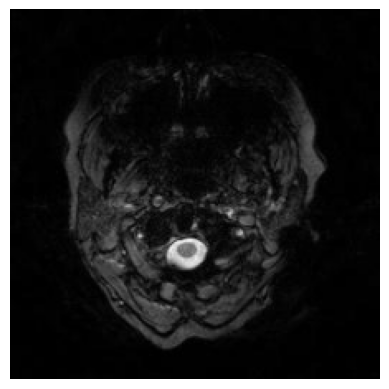

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return np.array([os.path.join(directory, image) for image in os.listdir(directory)])

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size = 224

# Function to load and preprocess image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to a specified size
    img = img.astype('float32') / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Display some AD images
for img_path in ad_images[:5]:

    img = load_and_preprocess_image(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display some MCI images
for img_path in mci_images[:5]:
    img = load_and_preprocess_image(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


# Step 2: Define Augmentation Functions


In [ ]:
def adaptive_thresholding(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
    thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
    return thresholded

def cropped(image):
    h, w, _ = image.shape
    start_row, start_col = int(h * .15), int(w * .15)
    end_row, end_col = int(h * .85), int(w * .85)
    cropped_image = image[start_row:end_row, start_col:end_col]
    cropped_image = cv2.resize(cropped_image, (img_size, img_size))
    return cropped_image

def filtered(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    filtered_image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    return filtered_image

def dip_processed(image):
    # Placeholder for custom DIP (Digital Image Processing) function
    dip_image = cv2.GaussianBlur(image, (5, 5), 0)
    return dip_image


# Step 3: Apply Augmentations and Save Images


In [ ]:
# Function to augment and display images
def augment_and_display_images(image_path, img_size=224):
    img = load_and_preprocess_image(image_path)
    augmentations = [
        (img, "Original"),
        (adaptive_thresholding(img), "Adaptive Thresholding"),
        (cropped(img), "Cropped"),
        (filtered(img), "Filtered"),
        (dip_processed(img), "DIP Processed")
    ]
    plt.figure(figsize=(20, 4))
    for i, (aug_img, title) in enumerate(augmentations):
        plt.subplot(1, len(augmentations), i+1)
        plt.imshow(aug_img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Apply and display augmentations for some AD images
for img_path in ad_images[:2]:
    augment_and_display_images(img_path, img_size)

# Apply and display augmentations for some MCI images
for img_path in mci_images[:2]:
    augment_and_display_images(img_path, img_size)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'
